In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

digits = datasets.load_digits()

In [22]:
X = digits.data
Y = digits.target
print(len(X))
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size=0.2)

        

1797


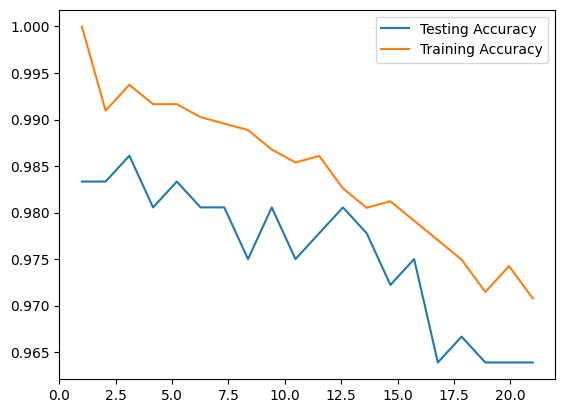

In [24]:
trainAccuracy = np.zeros(20)
testAccuracy = np.zeros(20)
x = np.linspace(1,21,20)

for i in range(1,21):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(xTrain, yTrain)
    trainAccuracy[i-1] = kNN.score(xTrain, yTrain)
    testAccuracy[i-1] = kNN.score(xTest, yTest)

plt.plot(x,testAccuracy)
plt.plot(x,trainAccuracy)
plt.legend(["Testing Accuracy", "Training Accuracy"])
plt.show()

kNNAccuracy = max(testAccuracy)

In [29]:
kernels = ['linear', 'poly', 'sigmoid']
kernelAccuracy = np.zeros(3)

for i in range(3):
    svm = SVC(kernel=kernels[i])
    svm.fit(xTrain, yTrain)
    yPred = svm.predict(xTest)
    report = classification_report(yTest, yPred)
    print(report)
    kernelAccuracy[i] = svm.score(xTrain, yTrain)

SVMAccuracy = max(kernelAccuracy)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.93      1.00      0.96        26
           2       1.00      1.00      1.00        46
           3       1.00      0.97      0.98        33
           4       0.97      1.00      0.99        36
           5       1.00      0.98      0.99        42
           6       1.00      0.98      0.99        42
           7       1.00      0.97      0.98        30
           8       0.94      0.91      0.92        33
           9       0.89      0.94      0.92        35

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        46
           3       1.00 

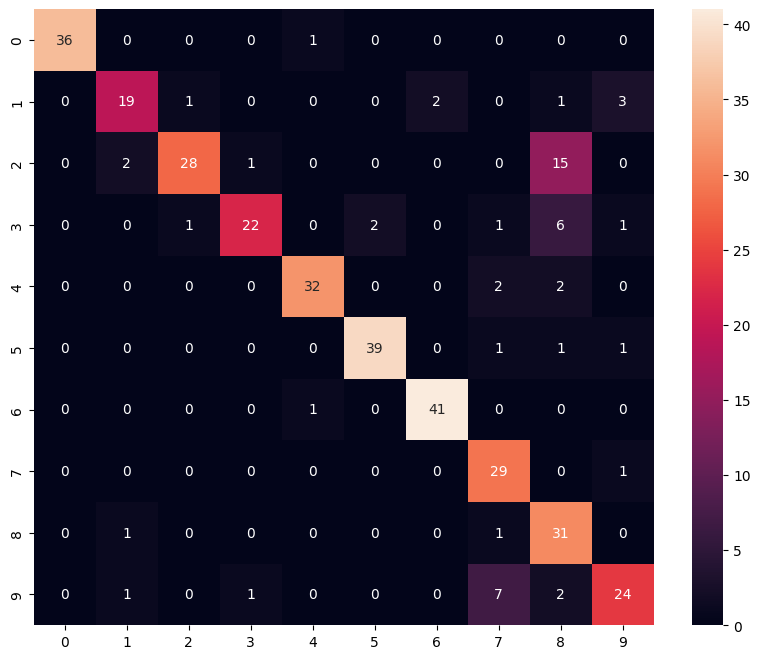

0.8361111111111111


In [30]:
bayes = GaussianNB()
bayes.fit(xTrain, yTrain)
yPred = bayes.predict(xTest)

confusionMatrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(10,8))
sns.heatmap(confusionMatrix, annot=True)
plt.show()

bayesCorrect = 0
for i in range(len(confusionMatrix)):
    bayesCorrect += confusionMatrix[i][i]
bayesAccuracy = bayesCorrect/len(xTest)
print(bayesAccuracy)

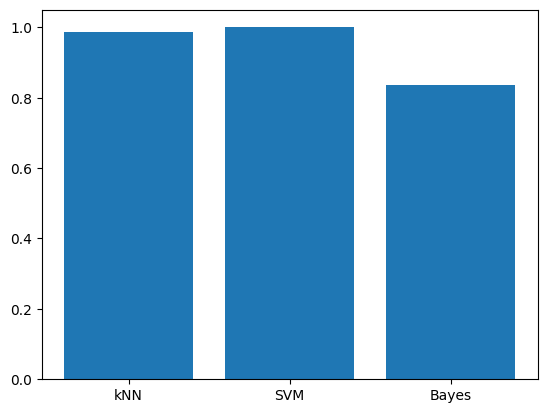

In [43]:
y = [kNNAccuracy, SVMAccuracy, bayesAccuracy]
x=[1,2,3]
plt.bar(x,y, width=0.8, tick_label = ['kNN','SVM','Bayes'])
plt.show()